# Proyecto Final UD2
#### UD2. Aprendizaxe Supervisada
#### MP. Sistemas de Aprendizaxe Automáticos
#### IES de Teis (Vigo), Cristina Gómez Alonso

En este proyecto, los alumnos del módulo de Machine Learning deberán demostrar los conocimientos adquiridos durante la UD2 y aplicar al menos dos algoritmos diferentes de aprendizaje supervisado vistos en clase (KNN, Regresión Lineal, Regresión Logística, Árboles de Decisión, SVM).

Para ello, tomaremos como referencia el dataset credit_train.csv y credit_test.csv que contienen la información sobre una campaña de márketing llevada a cabo mediante llamadas teléfonicas para captar clientes que quieran acceder a un crédito.

**Features o Input variables:**

1 - age: edad numérica
2 - job : tipo de trabajo (puede tomar los valores: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : estado civil (puede tomar los valores: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education : nivel de estudios (puede tomar los valores: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: ya tiene un crédito solicitado por defecto? (puede tomar los valores: 'no','yes','unknown')
6 - housing: tiene hipoteca? (puede tomar los valores: 'no','yes','unknown')
7 - loan: tiene una cuenta personal? (puede tomar los valores: 'no','yes','unknown')
8 - contact: tipo de comunicación de contacto (puede tomar los valores: 'cellular','telephone')
9 - month: último mes de contacto (puede tomar los valores: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: último día de la semana en el que se le ha contactado (puede tomar los valores: 'mon','tue','wed','thu','fri')
11 - duration: duración del último contacto en segundos (numérico). Importante: este atributo afecta en gran medida a la salida ya que si duration es 0, entonces  la salida es 'no')
12 - campaign: número de veces que se le ha contactado durante la campaña a este cliente (numérico, incluye el último contacto)
13 - pdays: número de días que han pasado desde que el cliente fue contactado por última vez(numérico; 999 significa que no ha sido contactado anteriormente)
14 - previous: número de contactos anteriores a esta campaña a este cliente(numérico)
15 - poutcome: resultado de la última campaña de marketing (categorical: 'failure','nonexistent','success')
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: IPC - indicador mensual (numérico)
18 - cons.conf.idx: índice de confianza de los consumidores - indicador mensual (numérico)
19 - euribor3m: euribor tasa 3 meses - indicador diario (numérico)
20 - nr.employed: número de trabajadores - indicador en porciones  (numérico)

**Output variable (desired target):**
21 - y - Suscripción al crédito por parte del cliente? (binary: 'yes','no')

Los requisitos mínimos de este proyecto consisten en:

* Etapas comunes 1, 2 y 3 de importación, análisis numérico y visual, así como preprocesado.
* Para cada algoritmo que apliques deberás de mantener la siguiente estructura de 5 etapas (del 4-8), pero puedes añadir subapartados o etapas adicionales.
* En cada etapa se deben añadir explicaciones justificativas de lo que se quiere hacer, así como de los resultados obtenidos.
* Como resultado final, se deben contrastar los resultados obtenidos y comparar los algoritmos utilizados indicando claramente cual y porqué obtiene mejor resultados.

* Cualificaciones:
- Uso de 2 algoritmos: cualificación máxima de 7 puntos
- Uso de 3 algoritmos: cualificación máxima de 9 puntos.
- Almacenaje de los datasets en AWS S3 y uso de 3 algoritmos: cualificación máxima de 10 puntos.

Uso de GIT para 



## 1. Importación de paquetes y dataset

In [3]:
#Importar librerias
import pandas as pd
# SKlear para LinearRegresion y BinaryTree
from sklearn.linear_model import LinearRegression
## Arboles binarios
from sklearn.tree import DecisionTreeClassifier
## KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix

## Mostrar resultados arboles
from sklearn.tree import export_graphviz

import seaborn as sns


In [4]:
#Recupera los datos en aws3
creditTest = pd.read_csv("https://dvc-pml.s3.amazonaws.com/credit-test.csv")
creditTrain = pd.read_csv("https://dvc-pml.s3.amazonaws.com/credit-train.csv")

## 2.EDA y Visual EDA

In [5]:
# EDA: Obtener informacion del dataset de pruebas
print("creditTrain:")
print("shape:",creditTrain.shape)
# print("describe:",creditTrain.describe())
print("info:",creditTrain.info())
print("////////")

creditTrain:
shape: (41188, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17 

In [6]:
creditTrain.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


## 3. Preprocessing data


In [7]:
# Determinar informacion innecesaria y eliminarla

# creditTrain.drop(["month", "day_of_week","emp_var_rate","cons_conf_idx","euribor3m","nr_employed","pdays"], inplace=True, axis=1)

# Borrar errores y valores nulos
print("nulos:")
print(creditTrain.isna().sum())
creditTrain.dropna(inplace=True, how="any")

# Crear una version del dataframe numerico, para poder valorar otras columnas
creditTrain_numeric = creditTrain
## Default
creditTrain_numeric["default"] = creditTrain_numeric.default.map(dict(yes=1,no=0,unknown=-1))

# Ver tipos de las variables
print(creditTrain.dtypes)

nulos:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64
age                 int64
job                object
marital            object
education          object
default             int64
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp_var_rate      float64
cons_price_idx    float64
cons_conf_idx     float64
euribor3m         float64
nr_employed       float64
y                   int64
dtype: object


## 4. Creación del modelo y división del dataset

### HeatMap

Feature set size: (41188, 2)
Variable set size: (41188, 1)


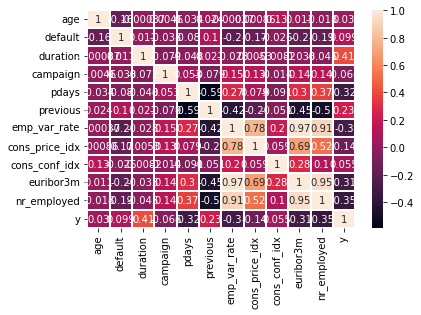

In [8]:
## Heatmap del modelo numerico, para coorelacion de strings
sns.heatmap(creditTrain_numeric.corr(), annot=True, linewidths=2)

##Relaciones mayores o cercanas al 0,50:
# duration-> y(0,41)
# pdays -> nr_employed(0,37)
# emp_var_rate -> cons_price_idx, euribor3m, nr_employed
# euribor3m-> pdays(0,3), emp_var_rate, cons_price_idx, nr_employed
# nr_employed-> emp_var_rate, pdays, cons_price_idx, euriborn
# y-> duration, 
##

####print("Heatmap creditTs:")
###sns.heatmap(creditTest.corr(), annot=True, linewidths=1)

##Relaciones mayores o cercanas al 0,50:
# emp_var_rate-> cons_price_idx, euribor3m, nr_employed
# cons_price_idx-> emp_var_rate, euribor3m, nr_employed(0,47)
# euribor3m-> emp_var_rate, cons_price_idx, nr_employed
# nr_employed-> emp_var_rate, cons_price_idx(0,47), euribor3m
##

#Dado que se busca predecir y, se tiene encuenta una relacion directa con "duration" y "previous"
#Para el entrenamiento se usara creditTrain. El dataframe incluye la salida a predecir "y"

## Existen tambien realciones no visibles por el heatmap:
## pdays: Todos los valores que no son 999 tienden a tener 1, mientras que 999 tiende a tener 0

l_column = list(creditTrain.columns) # Making a list out of column names
len_feature = len(l_column) # Length of column vector list
l_column

#Datos a medir, duration y previous
X_train = pd.DataFrame(data=creditTrain, index=creditTrain.index, columns=["duration","previous"])

# Datos a adivinar, y
y_train = (creditTrain[["y"]])

print("Feature set size:",X_train.shape)
print("Variable set size:",y_train.shape)

Se puede apreciar de forma directa que la probabilidad de que pidan un credito(y) esta ligada a la duracion(duration) y a la previedad(previous), con mayor cercania a la duracion.

Por revision manual de los resultados, se ve que los otros valores tampoco afectan mucho a los modelos

Tambien he probado a incorporar algunos valores, convirtiendolos en numericos, pero parece no haber influencia

## 5. Entrenamiento

### Entrenamiento Lineal

In [9]:
###### Entrenamiento lineal
lm = LinearRegression()
## Entrenamiento con la informacion de creditTrain
lm.fit(X_train, y_train)
print("The intercept term of the linear model:", lm.intercept_)
print("The coefficients of the linear model:", lm.coef_)

## Revisar si los valores son correctos
pd.DataFrame(data=lm.coef_, columns=["CoDuration","CoPrevious"])

The intercept term of the linear model: [-0.03806966]
The coefficients of the linear model: [[0.00048862 0.14177019]]


,CoDuration,CoPrevious
0,0.000489,0.14177


### Entrenamiento Arbol

In [10]:
###### Entrenamiento Arbol Binario
## Se genera el arbol
_depth = 3
tree_clf = DecisionTreeClassifier(
    max_depth=_depth,
    max_features=2,
    criterion="gini" ## Entropia es mas exacto, pero solo se nota la diferencia con grandes profundidades
    )
## Se alimenta el modelo
tree_clf.fit(
    #X=(X_train),
    X=(
        X_train
    ),
    y=(
        y_train
    )
    )


DecisionTreeClassifier(max_depth=3, max_features=2)

### Entrenamiento KNN

In [11]:
###### Entrenamiento K-Neighbors
scaler = MinMaxScaler()

#Se utiliza ravel() para cambiar el formato a array
y_rv = pd.Series.ravel(y_train)

_n_neighbors = 2 ## Probado con el valor 4

knn = KNeighborsClassifier(_n_neighbors)
knn.fit(X_train, y_rv)
print('Accuracy of K-NN classifier on training set: {:.2f}'
      .format(knn.score(X_train, y_train))) 

Accuracy of K-NN classifier on training set: 0.90


## 6. Análisis de resultados

### Comparativa principal de los valores

In [12]:
## Basico
_head = 10
print(
    pd.concat(objs=(X_train.head(_head),y_train.head(_head)), axis=1).sort_values("y", ascending=False)
)
## Se observa que, cuanto mayor es la duracion y la previedad, mas es la posibilidad de y

   duration  previous  y
2       339         2  1
4       137         1  1
8       174         1  1
0       210         0  0
1       138         0  0
3       185         0  0
5        68         0  0
6       204         0  0
7       191         0  0
9       191         1  0


### Analisis del modelo lineal

In [13]:
## Mostrar datos lineal

# Confianza. Cuanto mas grande, mas seguro debe estar el resultado para darlo por correcto

# Bajo este porcentaje, no existen, en principio, predicciones incorrectas. Pero es invalido si esta tomando valores muy bajos (Valores que se salen de la media comun)
# _linearPredictionPor = 0.00199705

# Este el es valor superio que menos margen de fallo aceptable da. 5 de cada 20 resultados los predice incorrectamente, el resto devuelve 0 cuando es 0.
_linearPredictionPor = 0.10215

# Tenemos un porcentaje que devuelve predicciones que se corresponden con la realidad, y uno que devuelve un margen de fallo del 25%
# Cuando se utiliza que que corresponden con los valores y, existen un gran margen de fallo.
# Cuando se utiliza el del marjen de fallo, 5 de cada 20 valores devuelven 0 (no se suscriben), mientras que en el tes y son 1(se suscriben)
### Entonces, el del marjen de fallo (0.10215) es mas adecuado para medir las posibilidades de este modelo

# Recupera los valores predecidos con el X_train, para ver cuan efectivo es.
_linearPrediction = lambda: [ 
    (1 if x >= _linearPredictionPor else 0) for x in lm.predict(X_train)
    ]
# Concatena para poder ver los valores mejor
matrizDiferencia = pd.concat(
    objs=[pd.DataFrame(data=_linearPrediction(), columns=["prediccion"]),
    y_train],
    axis=1
    )
# Con esto, se puede ver las predicciones correctas e incorrectas
# Muestra valores que y es 1. Sirve para ver predicciones correctas
print(matrizDiferencia.sort_values(by="y",ascending=False).head(20))

print()
# Muestra valores que y es 0. Sirve para ver preddiciones incorrectas
# print(matrizDiferencia.sort_values(by="y",ascending=True).head(20))


       prediccion  y
23772           0  1
19094           1  1
19091           1  1
3486            1  1
28834           1  1
3484            0  1
24280           0  1
3482            1  1
38106           1  1
32290           1  1
19088           1  1
3478            1  1
38109           1  1
24274           1  1
38115           0  1
28839           1  1
15241           0  1
24271           1  1
24282           0  1
3491            1  1



Confianza. Cuanto mas grande, mas seguro debe estar el resultado para darlo por correcto

Bajo este porcentaje, no existen, en principio, predicciones incorrectas. Pero es invalido si esta tomando valores muy bajos (Valores que se salen de la media comun).
- _linearPredictionPor = 0.00199705

Este el es valor superior que menos margen de fallo aceptable da. 5 de cada 20 resultados los predice incorrectamente, el resto devuelve 0 cuando es 0.
- _linearPredictionPor = 0.10215

Tenemos un porcentaje que devuelve predicciones que se corresponden con la realidad, y uno que devuelve un margen de fallo del 25%.
Cuando se utiliza que que corresponden con los valores y, existen un gran margen de fallo.
Cuando se utiliza el del marjen de fallo, 5 de cada 20 valores devuelven 0 (no se suscriben), mientras que en el tes y son 1(se suscriben).

**Entonces, el del margen de fallo (0.10215) es mas adecuado para medir las posibilidades de este modelo**


### Analisis del modelo de arbol 

In [14]:
## Mostrar datos arbol
export_graphviz(tree_clf, 
                out_file='./img/arbolb.dot',
                feature_names=["Duration","Previous"],
                rounded=True,
                filled=True)
! dot -Tpng ./img/arbolb.dot -o ./img/arbolb.png

#### Resultado arbol
![Resultado](img/arbolb.png)

Categoriza los valores segun la duracion y la previedad. 

La diferencia de este modelo es que busca categorizar por reduccion de valores, lo cual es efectivo para estos datos, que son numericos y se basan en que, cuanto mas sea alto la duracion de la llamada y mas veces haya estado presente en la campaña, mas es la posibilidad de que se suscriba

### Analisis del modelo KNN

In [15]:
## Mostrar datos Kn

## Primero, se intenta predecir lso valores con lso que se enseño
knn_train_pre = knn.predict(X_train)
## Se compara el esultado
print(confusion_matrix(y_train, knn_train_pre))
print(classification_report(y_train, knn_train_pre))
knn.get_params()


[[36001   547]
 [ 3532  1108]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95     36548
           1       0.67      0.24      0.35      4640

    accuracy                           0.90     41188
   macro avg       0.79      0.61      0.65     41188
weighted avg       0.88      0.90      0.88     41188



{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'uniform'}

Tras varias pruebas, existen dos posibilidades para trabajar este modelo:

Kn = 1:
- Si se seleccionar solo el vecino mas cercano, de los 36548 valores que son 0, **2643 se predicen como 1** incorrectamente
- De los 4640 que son 1, **2538 se predicen erroneamente como 0, mas de la mitad** 

Kn = 2:
- Si son los 2 mas cercanos, de 36548 valores que son 0, **solo 547 se predicen mal**.
- El problema es que, de 4640 valores que son 1, **3532 se predicen como 0**

El problema mas seguro es la falta de columnas mas coorelacionadas. Pero tras mirar el dataset, no exiten columnas que determinen mejor los valores.

Dado con ello, incluso aumentar el numero de datasets de entrenamiento, no supondria un cambio muy significativo. El problema es no haber suficientes valores para coorelacionar.

Se deja el modelo con los 2 vecinso mas cercanos, lo cual precice valores 0 con una precision del 0.91

## 7. Realización de predicciones

### Prediccion lineal

In [16]:
## Se genera un dataframe solo con los valores que se quieren predecir
X_test = pd.DataFrame(data=creditTest, index=creditTest.index, columns=["duration","previous"])
## Se ejecuta una preciccion
lm_predictions = lm.predict(X_test)

print ("Type of the predicted object:", type(lm_predictions))
print ("Size of the predicted object:", lm_predictions.shape)


Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (4119, 1)


### Prediccion Arbol

In [17]:
## Predicciones con BST
## Primero se predice posibles resultados, utilizando las columnas que se usaron en el entrenamiento
_tree_predict = tree_clf.predict(
    creditTest[["duration","previous"]]
)
## Luego,se convierte en DF y se le añade la columna "Prediccion"
_tree_predict = pd.DataFrame(_tree_predict, columns=["Prediccion"])

## Por ultimo, se concatena las predicciones con la tabla principal, en una variable aparte para evitar afectar al DT original
tree_predict = pd.concat(objs=[creditTest,_tree_predict],axis=1)

### Prediccion KNN

In [18]:
X = X_train.values
y = y_rv

# we create an instance of Neighbours Classifier and fit the data.
clf = KNeighborsClassifier(_n_neighbors, weights='distance')
clf.fit(X, y)

knn_predict = creditTest
knn_predict["Prediccion"] = clf.predict(creditTest[["duration","previous"]])

## 8. Visualización

### Mostrar predicciones lineal

In [19]:

# Se recuerda la variable para determinar si una prediccion sera aceptada o no: _linearPredictionPor = 0.10215
_linearPredictionPor = 0.10215

# Considera
_linearPrediction = lambda: [ 
    (1 if x >= _linearPredictionPor else 0) for x in lm_predictions
    ]
## Matriz de diferencia con al confianza aplicada
lm_prediction_Confianza = pd.concat(
    objs=[
        creditTest
        ,pd.DataFrame(data=_linearPrediction(), columns=["prediccion"])],
    axis=1
    )
## Sin confianza aplicada
lm_prediction_SinConfianza = pd.concat(
    objs=[
        creditTest
        ,pd.DataFrame(data=lm_predictions, columns=["prediccion"])],
    axis=1
    )

print("####")
# Sin confianza
print(lm_prediction_SinConfianza[["duration","previous","prediccion"]].sort_values("prediccion",ascending=False).head(10))
print("####")
# Confianza aplicada
print(lm_prediction_Confianza[["duration","previous","prediccion"]].sort_values("prediccion",ascending=False).head(10))

####
      duration  previous  prediccion
2231      3643         0    1.741967
1546      3253         0    1.551406
1392      2653         0    1.258235
1685      2301         0    1.086241
262       1868         1    1.016440
1190      1551         2    1.003318
448        655         5    0.990826
3266      1980         0    0.929395
2122       212         6    0.916139
2018       473         5    0.901898
####
      duration  previous  prediccion
0          487         0           1
1464       217         1           1
3186       490         0           1
1509       383         0           1
1508       225         1           1
1507       343         0           1
3187       360         1           1
1504       523         0           1
1503       303         0           1
3189       446         0           1


En la primera tabla, se puede apreciar **predicciones de que solicitaran los creditos, con una posiblididad segura de ello.** La siguiente tabla muestra valores con la confianza aplicada, la cual ya se vio con anterioridad para valorar un intervalo de seguridad.

La segunda tabla muestra valores que son menos seguros de que ocurran, pero existe una **probabilidad estadistica de que 15 de cada 20 si pidan credito**, siendo algo que valorar tambien.

In [20]:
print(lm_prediction_SinConfianza[["duration","previous","prediccion"]].sort_values("prediccion",ascending=True).head(10))
print("####")
# Confianza aplicada
print(lm_prediction_Confianza[["duration","previous","prediccion"]].sort_values("prediccion",ascending=True).head(10))

      duration  previous  prediccion
1950         0         0   -0.038070
1600         4         0   -0.036115
1896         5         0   -0.035627
934          5         0   -0.035627
2534         5         0   -0.035627
2202         5         0   -0.035627
358          6         0   -0.035138
441          6         0   -0.035138
2673         6         0   -0.035138
108          7         0   -0.034649
####
      duration  previous  prediccion
2059       123         0           0
2398        77         0           0
2399        72         0           0
2400        77         0           0
2401       139         0           0
2406       197         0           0
2408       158         0           0
2409        28         0           0
2411        42         0           0
2413       108         0           0


Las tablas anteriores, pero invertidas. Se pu**ede observar que la primera predice negativamente que esas personas no pediran un credito**, y tiene sentido ya que no tienen apenas tiempo y no estubieron previamente.

La segunda observa valores de duracion muy bajos, y sin previedad. Con la confianza aplicada, **no los determina como posibles solicitantes de creditos**

### Mostrar predicciones Arbol

In [21]:
##Visual de BST
tree_predict.sort_values("Prediccion", ascending=False).head(10)
tree_predict[["previous","duration","Prediccion"]].sort_values("Prediccion", ascending=False).head(10)

,previous,duration,Prediccion
153,3,309,1
3944,0,980,1
3437,0,1259,1
2285,3,718,1
2412,0,992,1
1661,2,183,1
1260,2,754,1
1660,4,481,1
345,1,632,1
3436,2,362,1


Como se puede ver en los resultados, valora que los clientes con una gran duracion de llamada tienden a solicitar credito. Tambien la previedad juega un papel crucial en la prediccion, siendo un "soporte" a aumentar las probabilidades de que lo prediga como solicitante. 

In [22]:
tree_predict[["previous","duration","Prediccion"]].sort_values("Prediccion", ascending=True).head(10)

,previous,duration,Prediccion
0,0,487,0
2695,0,186,0
2696,0,112,0
2697,0,94,0
2698,0,254,0
2699,0,276,0
2700,0,330,0
2701,1,62,0
2702,0,536,0
2703,1,275,0


Asi mismo, predice que aquellos que tienen una duracion de llamada escasa, como personas que no pediran el credito. Incluso si tienen previedad en la campaña, no los identifica como posibles solicitantes al tener una duracion escasa.

### Mostrar predicciones KNN

In [23]:
knn_predict[["duration","previous","Prediccion"]].sort_values("Prediccion", ascending=False).head(10)

,duration,previous,Prediccion
1833,857,0,1
282,209,2,1
1320,1234,0,1
2359,848,0,1
292,806,2,1
1846,458,4,1
288,1207,1,1
1850,352,1,1
2862,289,4,1
2869,739,0,1


Lo mismo como los anteriores. **Predice como solicitante aquellos con una duracion de llamada elevada, y una probabilidad aumentada si tienen previedad a esta campaña.**

Algo que remarcar, es que **este modelo le da mucha mas prioridad a la previedad que los modelos anteriores**

In [24]:
knn_predict[["duration","previous","Prediccion"]].sort_values("Prediccion").head(10)

,duration,previous,Prediccion
0,487,0,0
2696,112,0,0
2697,94,0,0
2698,254,0,0
2699,276,0,0
2700,330,0,0
2701,62,1,0
2702,536,0,0
2703,275,1,0
2704,230,0,0


La inversion del resultado. La duracion sigue siendo el factor clave para determinar a los solicitantes.

# Resultado

- KNN no es un modelo efectivo para medir esto
- Lineal es funcional, y puedes aplicar una confianza para reducir margenes de fallo o aumentar los de acierto
- Los arboles son utiles si se aplica una gran profundidad y entropia